# Assignment 5: Model Interpretability
-----------------------------------
**Your Name Here: Manas Joshi**

You previously worked with this dataset on the 'Sampling' notebooks. Now, you will try to interpret the model!

You will build a classification model of your choice (you may use SMOTE or not - I'm not testing how good your model is for this assignment, just that you know how to interpret the model!). 

Then you will:
* Print the Top 5 features (using permutation importance with 20 repeats) in a box plot.
* Create the partial dependence plots for the top 5 features (you may opt to use the num_grid_points argument). Customize the plots so that the Y axis is consistent on each of the five plots.
* Write five meaningful bullets about what you see in the plots. Does anything surprise you? What do the X and Y axis mean in each plot? 
  * Optional: Any issues with correlated predictors (read here for a cool way on how to address this: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html)?

In [862]:
#https://drive.google.com/file/d/1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W/view?usp=share_link
!gdown 1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W

Downloading...
From: https://drive.google.com/uc?id=1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W
To: /content/train_loan_imbalanced.csv
100% 38.0k/38.0k [00:00<00:00, 84.3MB/s]


In [863]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [864]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import seaborn as sns
from collections import Counter
from pycebox.ice import ice, ice_plot
from sklearn.preprocessing import LabelEncoder

In [865]:
import pandas as pd
df = pd.read_csv('/content/train_loan_imbalanced.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA(Exploratory Data Analysis)

In [866]:
# good luck!
# Checking Null values 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [867]:
df.shape

(614, 13)

In [868]:
# Dropping the missing values
df.dropna(inplace=True)

In [869]:
# Checking if the dataframe still has null values 
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [871]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [872]:
df.drop('Loan_ID', axis=1, inplace=True)

In [873]:
# calculating correlations between predictors and predicting value
corr_matrix = df.corr()


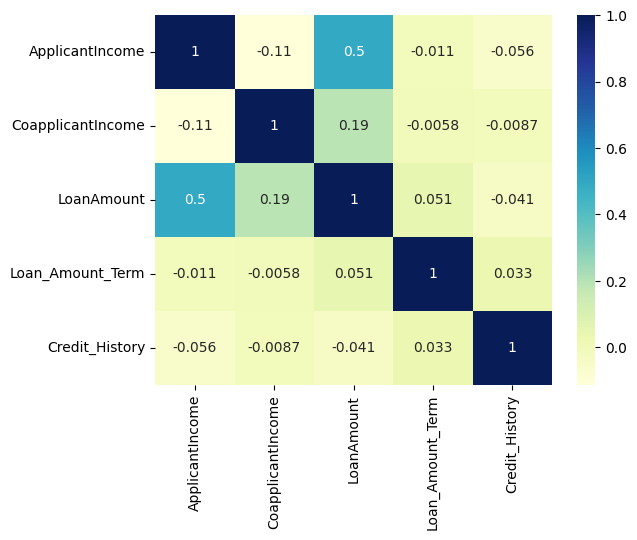

In [874]:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


## Label Encoding of categorical data


In [876]:
# Converting categorical data to numerical one by LabelEncoder encoding
col = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area','Loan_Status']
le = LabelEncoder()
for column in col:
    df[column] = le.fit_transform(df[column])


In [877]:
# Data-frame encoded 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [878]:
# Encoded dataframe statistics 
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [879]:
# Target Variable y (where loan status is yes or no) converted it to a regression problem
y = df['Loan_Status']
y.shape


(480,)

In [880]:

X = df.drop('Loan_Status', axis =1)
print(X.shape)

(480, 11)


In [881]:
#Dividing the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state =42)

In [882]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 11) (96, 11) (384,) (96,)


## Scaling the numerical data for optimization

This could be used to optimize the model further

In [883]:

# I used Min- max scaler here to scale the numerical data which I encoded through Label-encoder

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [884]:
tmp = pd.DataFrame(X_train)
tmp.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.817708,0.632812,0.252604,0.197917,0.153646,0.065078,0.048334,0.227792,0.687289,0.846354,0.518229
std,0.386588,0.482667,0.336571,0.398949,0.361079,0.075379,0.082026,0.131002,0.151586,0.361079,0.390395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033080,0.000000,0.155245,0.729730,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045813,0.036631,0.202200,0.729730,1.000000,0.500000
75%,1.000000,1.000000,0.416667,0.000000,0.000000,0.070167,0.066591,0.269036,0.729730,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Random Forest Classifier Model

In [885]:
# Modeling the data

#RFC = RandomForestClassifier(max_depth=10,random_state=42) # I specifically choose maximum depth as 10 otherwise it will overfit training data
RFC = RandomForestClassifier(max_depth=10)
RFC.fit(X_train, y_train)




RandomForestClassifier(max_depth=10)

In [886]:
y_train_predict = RFC.predict(X_train)
y_test_predict = RFC.predict(X_test)

## Accuracy of training and testing data

In [887]:
accuracy_training = accuracy_score(y_train, y_train_predict)
print("Training Accuracy :",accuracy_training)
accuracy_testing = accuracy_score(y_test, y_test_predict)
print("Testing Accuracy: ",accuracy_testing)

Training Accuracy : 0.9401041666666666
Testing Accuracy:  0.8125


##Precision- score of the data


In [888]:
# Training precision score
train_precision  = precision_score(y_train, y_train_predict)
print("Precision Score training data: ", train_precision)

# Testing precision score
test_precision  = precision_score(y_test, y_test_predict)
print("Precision Score Testing data: ", test_precision)


Precision Score training data:  0.9198606271777003
Precision Score Testing data:  0.8048780487804879


## Recall score of the data

In [889]:
# Training recall score
train_recall  = recall_score(y_train, y_train_predict)
print("Recall Score training data: ", train_recall)

# Testing recall score
test_recall  = recall_score(y_test, y_test_predict)
print("Recall Score Testing data: ", test_recall)

Recall Score training data:  1.0
Recall Score Testing data:  0.9705882352941176


## F1-score of the model

In [890]:
# Training F-1 Score
train_f1  = f1_score(y_train, y_train_predict)
print(" F1 Score training data: ", train_f1)

# Testing F-1 score
test_f1  = f1_score(y_test, y_test_predict)
print("F1 Score Testing data: ", test_f1)

 F1 Score training data:  0.9582577132486388
F1 Score Testing data:  0.8800000000000001


## Permutation testing for Random Forest Classifier

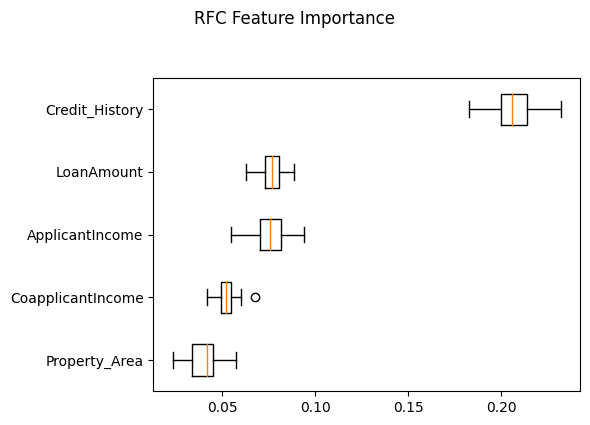

In [891]:
from sklearn.inspection import permutation_importance



clf = RFC 

result = permutation_importance(clf, X_train, y_train, n_repeats=20,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()[-5:]

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('RFC Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

# Top five features which are important for the model are Credit_History, LoanAmount, ApplicantIncome, CoapplicantIncome, Property_Area

## Model with less number of features(optimized)

I ran the same model with top 5 features and got the same metrics such as accuracy, precision, and recall. The updated model is simpler version of the previous model. 

In [892]:
#df_updated = df_encoded[['Credit_History', 'CoapplicantIncome', 'Property_Area', 'ApplicantIncome', 'LoanAmount']]

In [893]:
#y_updated = df_updated['Loan_Status']
#y_updated.head()

In [894]:
#X_updated = df_updated.drop('Loan_Status', axis=1)
#X_updated.head()

In [895]:
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_updated, y_updated, shuffle= True, test_size=0.20)


In [896]:
#Counter(df_updated['Credit_History'])

## Modeling the updated dataset with 5 features

In [897]:
#RFC_updated = RandomForestClassifier(max_depth=10,random_state=42) # I specifically choos maximum depth as 10
#RFC_updated.fit(X_train_1, y_train_1)
#y_train_predict_1 = RFC_updated.predict(X_train_1)
#y_test_predict_1 = RFC_updated.predict(X_test_1)


## Accuracy of the updated model

In [898]:
#updated_accuracy_training = accuracy_score(y_train_1, y_train_predict_1)
#print("Updated Training Accuracy :",accuracy_training)
#updated_accuracy_testing = accuracy_score(y_test_1, y_test_predict_1)
#print("Updated Testing Accuracy: ",accuracy_testing)

It is clear from both of the accuracies of both models RFC and RFC_updated that considering top 5 features has not change the accuracy too much and the updated model has less features which is computationally efficient and intuitively easy to understand. 

# Partial Dependence Plots

In [899]:
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.shape

(384, 11)

In [900]:
train_X_df['LoanAmount'].nunique()


163

# Partial dependence plots for the top 5 feature

## 1.Credit_History

In [901]:
tmpdf = ice(data=train_X_df, 
            column='Credit_History', 
                   predict=RFC.predict,num_grid_points=10) 
                                          
print(np.shape(tmpdf))

(2, 384)


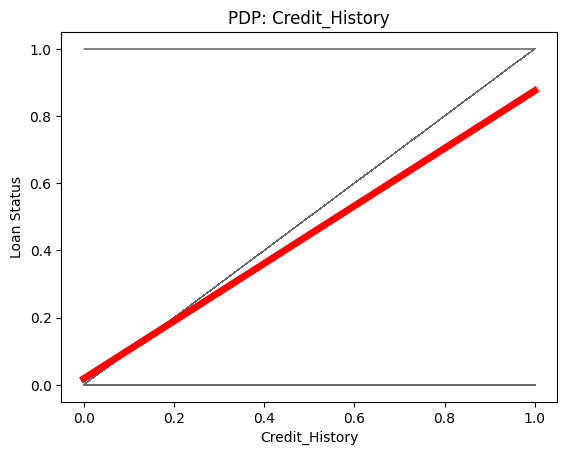

In [902]:
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Credit_History')
plt.ylabel('Loan Status')
plt.xlabel('Credit_History');
plt.show()

Here, Y - axis represents our dpendent variable Loan-Status and X-axis is predicting variable Credit_History 

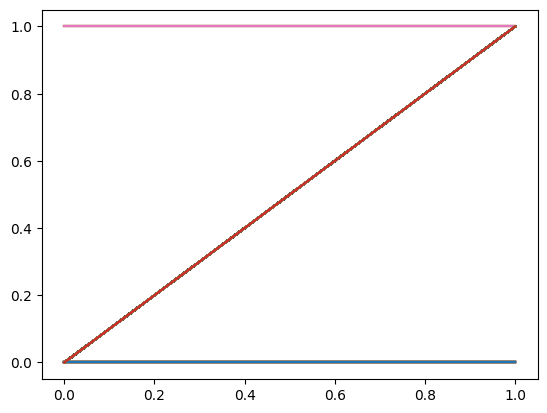

In [903]:
plt.plot(tmpdf)
plt.show()

In [904]:
tmpdf

data_Credit_History      0.0                                               \
Gender                   0.0                                                
Married                  0.0                                                
Dependents               0.0                                                
Education                0.0                                                
Self_Employed            0.0                                                
ApplicantIncome     0.016698 0.024576 0.027829 0.037477 0.041558 0.049672   
CoapplicantIncome   0.053196 0.265390 0.055058 0.000000 0.000000 0.000000   
LoanAmount          0.159052 0.216582 0.160745 0.104907 0.113367 0.181049   
Loan_Amount_Term    0.729730 0.729730 0.729730 0.729730 0.729730 0.729730   
Property_Area            0.5      0.5      1.0      1.0      1.0      0.5   
Credit_History                                                              
0.0                        0        1        0        0        0        0   
1.0                        1        1        1        1        1        1   

data_Credit_History                                      ...      1.0  \
Gender                                                   ...      1.0   
Married                                    1.0           ...      1.0   
Dependents                                 0.0           ...      1.0   
Education                                  0.0           ...      0.0   
Self_Employed                     1.0      0.0      1.0  ...      0.0   
ApplicantIncome     0.059988 0.054830 0.030860 0.066172  ... 0.106370   
CoapplicantIncome   0.000000 0.000000 0.101664 0.000000  ... 0.147649   
LoanAmount          0.159052 0.209814 0.187817 0.162437  ... 0.204738   
Loan_Amount_Term    0.729730 0.729730 0.729730 0.729730  ... 0.729730   
Property_Area            0.5      0.5      1.0      0.0  ...      0.0   
Credit_History                                           ...            
0.0                        0        0        0        0  ...        0   
1.0                        1        1        1        1  ...        1   

data_Credit_History                                                        \
Gender                                                                      
Married                                                                     
Dependents                                                                  
Education                                  1.0                              
Self_Employed                     1.0      0.0                              
ApplicantIncome     0.115696 0.063278 0.023760 0.030884 0.036425 0.041707   
CoapplicantIncome   0.000000 0.052428 0.022283 0.046901 0.000000 0.000000   
LoanAmount          0.450085 0.301184 0.143824 0.277496 0.175973 0.121827   
Loan_Amount_Term    0.729730 0.729730 1.000000 0.729730 0.729730 0.324324   
Property_Area            0.0      0.5      0.5      0.0      0.0      0.0   
Credit_History                                                              
0.0                        0        0        0        0        0        0   
1.0                        1        1        1        0        1        0   

data_Credit_History                             
Gender                                          
Married                                         
Dependents                                      
Education                                       
Self_Employed                     1.0           
ApplicantIncome     0.045764 0.068683 0.085962  
CoapplicantIncome   0.029051 0.000000 0.000000  
LoanAmount          0.153976 0.204738 0.196277  
Loan_Amount_Term    0.729730 0.729730 0.054054  
Property_Area            0.5      0.0      1.0  
Credit_History                                  
0.0                        0        0        0  
1.0                        1        1        1  

[2 rows x 384 columns]

## 2. LoanAmount

(10, 384)


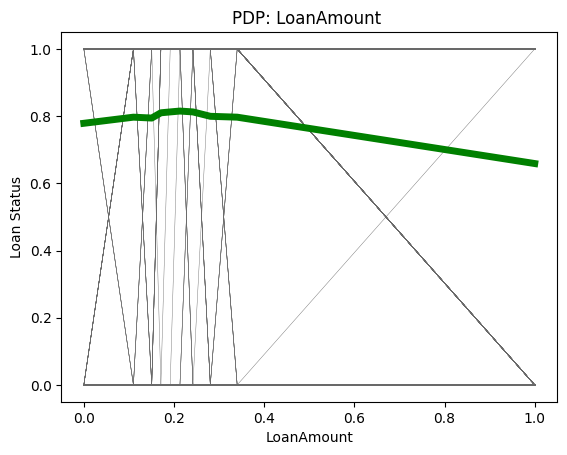

In [905]:
tmpdf = ice(data=train_X_df, column='LoanAmount', 
                   predict=RFC.predict, num_grid_points=10)
print(np.shape(tmpdf))

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'green'})
plt.title('PDP: LoanAmount ')
plt.ylabel('Loan Status')
plt.xlabel('LoanAmount');
plt.show()

Here, Y - axis represents our dpendent variable Loan-Status and X-axis is predicting variable LoanAmount

## 3. ApplicantIncome

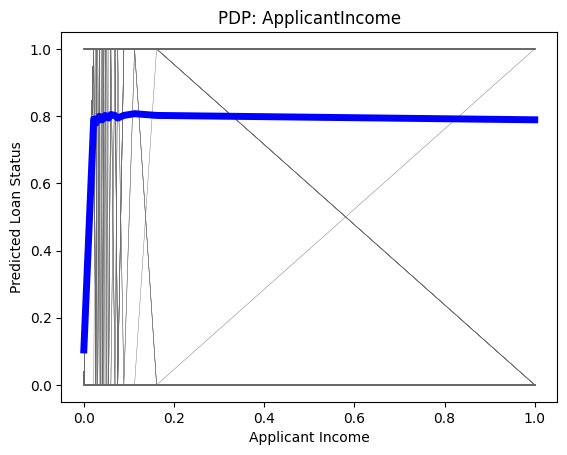

In [906]:
tmpdf = ice(data=train_X_df, column='ApplicantIncome', 
                   predict=RFC.predict, num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'blue'})
plt.title('PDP: ApplicantIncome')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Applicant Income');
plt.show()

Here, Y - axis represents our dpendent variable Loan-Status and X-axis is predicting variable Applicant Income

##4. CoapplicantIncome

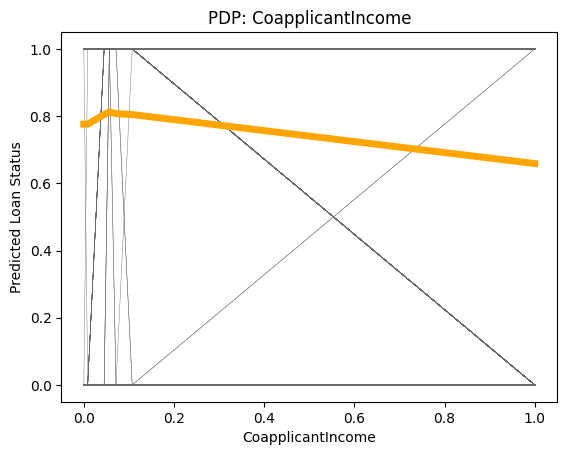

In [907]:
tmpdf = ice(data=train_X_df, column='CoapplicantIncome', 
                   predict=RFC.predict, num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'orange'})
plt.title('PDP: CoapplicantIncome')
plt.ylabel('Predicted Loan Status')
plt.xlabel('CoapplicantIncome');
plt.show()

Here, Y - axis represents our dpendent variable Loan-Status and X-axis is predicting variable CoapplicantIncome

##5. Property_Area

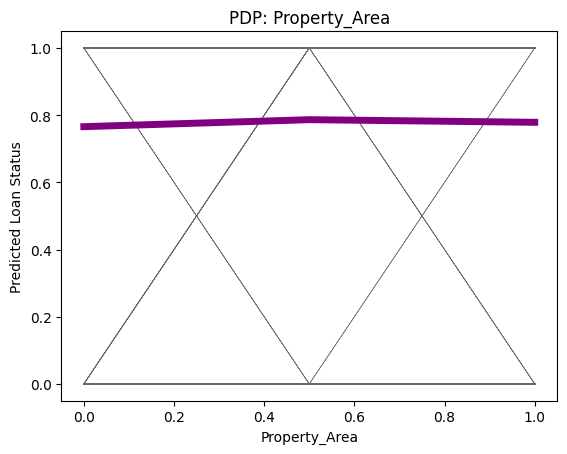

In [908]:

tmpdf = ice(data=train_X_df, column='Property_Area', 
                   predict=RFC.predict, num_grid_points=30)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'purple'})
plt.title('PDP: Property_Area')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Property_Area');
plt.show()

Here, Y - axis represents our dpendent variable Loan-Status and X-axis is predicting variable Propert_Area

## Meaningful Points

* Every Fixed value for a particular feature is ran for 384 times and then average of that value is taken for modeling.
* Each ice-curve corresponds to each row in X_train.
* Every curve(i.e rows) will take range of unique value of features(i.e coloumn).
* Out of my surprise, 1 unique column value generate 384 curves. 
* All of the curves are not flat, it makes an intuitive sense that they are impactful to the model.


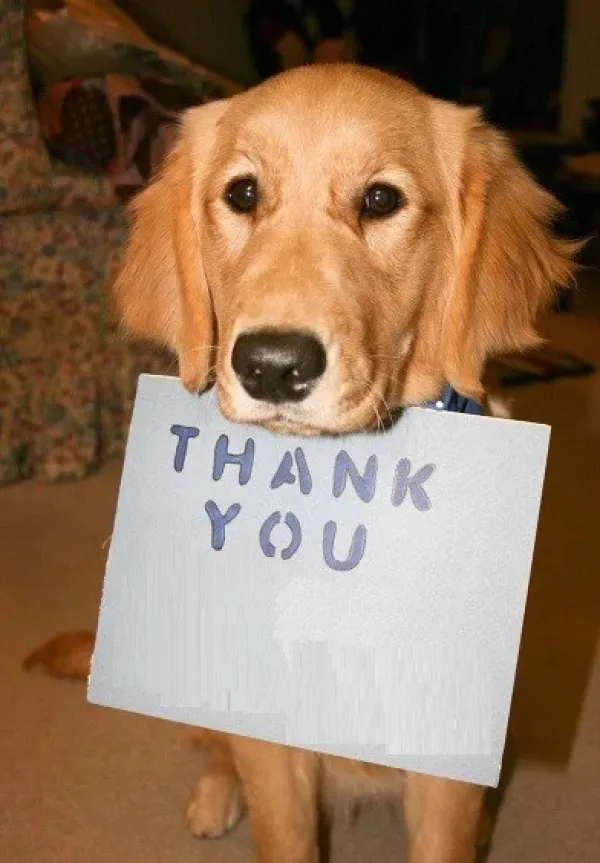